In [1]:
import gym
from agents import *
from policies import *
from interact import Interact
from preprocess import *
from utils import compose
import matplotlib.pyplot as plt
import numpy as np
from math import log10, radians

In [10]:
env = gym.make('MountainCar-v0')
n_actions = env.action_space.n
n_features = env.observation_space.shape[0]
lows = env.observation_space.low
highs = env.observation_space.high

In [50]:
preprocessing = [
    Normalise(n_features, lows, highs),
    FullAggregation(n_features, 10)
]
preprocess = compose(*preprocessing)
n_output = preprocessing[-1].n_output
print(n_output)

100


In [51]:
agent = TreeAgent(
    n_actions, n_output, 1, Greedy(), EGreedy(0.0), 1, 0.1)
def eps_end(i):
    pass
#     agent.behaviour_policy.epsilon = max(0.1, min(1, 1 - log10((i + 1) / 25)))
#     agent.learning_rate = max(0.1, min(1, 1 - log10((i + 1) / 25)))
#     agent.behaviour_policy.epsilon *= 0.992
#     agent.learning_rate *= 0.99

eps_act, eps_obs, eps_rewards, eps_states, eps_actions = \
    Interact.train(
        env, agent, 500, preprocess=preprocess, 
        eps_end=eps_end)

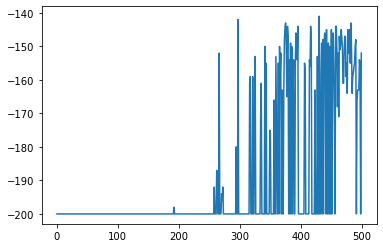

In [52]:
eps_reward = [sum(ep_rewards) for ep_rewards in eps_rewards]
plt.plot(eps_reward)
plt.show()

In [56]:
Interact.test(env, agent, 0.0, preprocess=preprocess)

154


In [125]:
preprocessing = [
    Normalise(n_features, lows, highs),
    Fourier(n_features, 10)
]
preprocess = compose(*preprocessing)
n_output = preprocessing[-1].n_output
print(n_output)

100


In [126]:
agent = TreeAgent(
    n_actions, n_output, 1, Greedy(), EGreedy(0.0), 1, 0.5)
def eps_end(i):
    pass
eps_act, eps_obs, eps_rewards, eps_states, eps_actions = \
    Interact.train(
        env, agent, 100, preprocess=preprocess, 
        eps_end=eps_end)

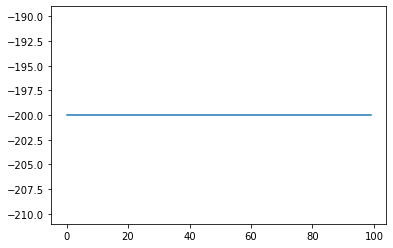

In [127]:
eps_reward = [sum(ep_rewards) for ep_rewards in eps_rewards]
plt.plot(eps_reward)
plt.show()

In [128]:
Interact.test(env, agent, 0.0, preprocess=preprocess)

199
